In [12]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
color_list = list(colors._colors_full_map.values())

# Sensitivities formulae

In [13]:
### Prob dist
def Phi(z):
    return norm.cdf(z)
def PhiPrime(z):
    return ((2*np.pi)**(-1/2)) * np.exp((-z**2)/2)

    
    
### Price Formulas
def d1(K, S, T, sig, r, d):
    return (np.log(S/K) + (r - d + (sig**2)/2)*T) / (sig * np.sqrt(T))

def d2(K, S, T, sig, r, d):
    return (np.log(S/K) + (r - d - (sig**2)/2)*T) / (sig * np.sqrt(T))

def Payoff(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return max(0, S-K)
    if str(Option).title()[0] == 'P':
        return max(0, K-S)
    
### Price
def V(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return S * np.exp(-d * T) * Phi(d1(K, S, T, sig, r, d)) - K * np.exp(-r * T) * Phi(d2(K, S, T, sig, r, d))
    if str(Option).title()[0] == 'P':
        return - S * np.exp(-d * T) * Phi(-d1(K, S, T, sig, r, d)) - K * np.exp(-r * T) * Phi(-d2(K, S, T, sig, r, d))
    
    
### First Order
def Delta(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return Phi(d1(K, S, T, sig, r, d)) * np.exp(-d * T)
    if str(Option).title()[0] == 'P':
        return - Phi(-d1(K, S, T, sig, r, d)) * np.exp(-d * T)
    
    
def Vega(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return S * np.exp(-d * T) * np.sqrt(T) * PhiPrime(d1(K, S, T, sig, r, d))
    if str(Option).title()[0] == 'P':
        return S * np.exp(-d * T) * np.sqrt(T) * PhiPrime(d1(K, S, T, sig, r, d))
    
    
def Vega_Verification(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return K * np.exp(-r * T) * PhiPrime(d2(K, S, T, sig, r, d)) * np.sqrt(T) 
    if str(Option).title()[0] == 'P':
        return K * np.exp(-r * T) * PhiPrime(d2(K, S, T, sig, r, d)) * np.sqrt(T) 
        
def Theta(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return - np.exp(-d * T) * ((S * PhiPrime(d1(K, S, T, sig, r, d)) * sig)/(2*np.sqrt(T))) - (r*K*np.exp(-r*T)*Phi(d2(K, S, T, sig, r, d))) + d * S * np.exp(-d*T) * Phi(d1(K, S, T, sig, r, d))
    if str(Option).title()[0] == 'P':
        return - np.exp(-d * T) * ((S * PhiPrime(-d1(K, S, T, sig, r, d)) * sig)/(2*np.sqrt(T))) + (r*K*np.exp(-r*T)*Phi(-d2(K, S, T, sig, r, d))) - d * S * np.exp(-d*T) * Phi(-d1(K, S, T, sig, r, d))

        
def Rho(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return K * T * np.exp(-r*T) * Phi(d2(K, S, T, sig, r, d))
    if str(Option).title()[0] == 'P':
        return - K * T * np.exp(-r*T) * Phi(-d2(K, S, T, sig, r, d))
        
def Lambda(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return Delta(K, S, T, sig, r, d, Option = 'Call') * (S/V(K, S, T, sig, r, d, Option = 'Call'))
    if str(Option).title()[0] == 'P':
        return Delta(K, S, T, sig, r, d, Option = 'Call') * (S/V(K, S, T, sig, r, d, Option = 'Call'))
    
### Second Order
        
def Gamma(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return np.exp(-d * T) * PhiPrime(d1(K, S, T, sig, r, d))/(S*sig*np.sqrt(T))
    if str(Option).title()[0] == 'P':
        return np.exp(-d * T) * PhiPrime(d1(K, S, T, sig, r, d))/(S*sig*np.sqrt(T))
        
def Gamma_Verification(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return K * np.exp(-r * T) * PhiPrime(d2(K, S, T, sig, r, d))/((S**2)*sig*np.sqrt(T))
    if str(Option).title()[0] == 'P':
        return K * np.exp(-r * T) * PhiPrime(d2(K, S, T, sig, r, d))/((S**2)*sig*np.sqrt(T))
        
def Volga(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))/sig)
    if str(Option).title()[0] == 'P':
        return np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))/sig)
        
def Vomma(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return S * np.exp(-d*T)*PhiPrime(d1(K, S, T, sig, r, d)) * np.sqrt(T) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))/sig)
    if str(Option).title()[0] == 'P':
        return S * np.exp(-d*T)*PhiPrime(d1(K, S, T, sig, r, d)) * np.sqrt(T) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))/sig)
        
def Vanna(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * (d2(K, S, T, sig, r, d)/sig)
    if str(Option).title()[0] == 'P':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * (d2(K, S, T, sig, r, d)/sig)
        
def Charm(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return d * np.exp(-d*T) * Phi(d1(K, S, T, sig, r, d)) - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * ((2*(d-r)*T - (d2(K, S, T, sig, r, d) * sig * np.sqrt(T)))/(2*T*sig*np.sqrt(T)))
    if str(Option).title()[0] == 'P':
        return - d * np.exp(-d*T) * Phi(-d1(K, S, T, sig, r, d)) - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d)) * ((2*(d-r)*T - (d2(K, S, T, sig, r, d) * sig * np.sqrt(T)))/(2*T*sig*np.sqrt(T)))
    
# Vera/Rhova
# DVegaDTime
    
### Third Order    
def Color(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d))/(2*S*T*sig*np.sqrt(T))*(2*d*T + 1 + d1(K, S, T, sig, r, d)*(2*(r-d)*T-d2(K, S, T, sig, r, d)*sig*np.sqrt(T)))
    if str(Option).title()[0] == 'P':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d))/(2*S*T*sig*np.sqrt(T))*(2*d*T + 1 + d1(K, S, T, sig, r, d)*(2*(r-d)*T-d2(K, S, T, sig, r, d)*sig*np.sqrt(T)))
    
    
def Speed(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d))/ (S**2 * sig *np.sqrt(T)) * ((d1(K, S, T, sig, r, d))/(sig*np.sqrt(T)) + 1)
    if str(Option).title()[0] == 'P':
        return - np.exp(-d*T) * PhiPrime(d1(K, S, T, sig, r, d))/ (S**2 * sig *np.sqrt(T)) * ((d1(K, S, T, sig, r, d))/(sig*np.sqrt(T)) + 1)
    
        
def Speed_Verification(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return -(Gamma(K, S, T, sig, r, d)/S) * (1+d1(K, S, T, sig, r, d)/(sig*np.sqrt(T)))
    if str(Option).title()[0] == 'P':
        return -(Gamma(K, S, T, sig, r, d)/S) * (1+d1(K, S, T, sig, r, d)/(sig*np.sqrt(T)))
        
def Ultima(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return ((- Vega(K, S, T, sig, r, d))/(sig**2))*(d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)*(1-d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))+(d1(K, S, T, sig, r, d))**2+(d2(K, S, T, sig, r, d))**2)
    if str(Option).title()[0] == 'P':
        return ((- Vega(K, S, T, sig, r, d))/(sig**2))*(d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)*(1-d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d))+(d1(K, S, T, sig, r, d))**2+(d2(K, S, T, sig, r, d))**2)
        
def Zomma(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return - np.exp(-d*T) * ((PhiPrime(d1(K, S, T, sig, r, d))*(d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)-1))/(S**2 * sig * np.sqrt(T)))
    if str(Option).title()[0] == 'P':
        return - np.exp(-d*T) * ((PhiPrime(d1(K, S, T, sig, r, d))*(d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)-1))/(S**2 * sig * np.sqrt(T)))
        
def Zomma_Verification(K, S, T, sig, r, d, Option = 'Call'):
    if str(Option).title()[0] == 'C':
        return Gamma(K, S, T, sig, r, d) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)-1)/sig)
    if str(Option).title()[0] == 'P':
        return Gamma(K, S, T, sig, r, d) * ((d1(K, S, T, sig, r, d)*d2(K, S, T, sig, r, d)-1)/sig)
      


# Graph function

In [14]:
def Graph(X, Option = 'Call', *args):
    #First Y axis
    axDic = {}
    fig, axDic['0'] = plt.subplots()
    axDic['0'].set_xlabel(str(X))
    for x in range(len(args)):
        print(args[x].__name__)
        if x != 0:
            axDic[str(x)] = axDic['0'].twinx()
        axDic[str(x)].set_ylabel(args[x].__name__, color=colors_list[x])
        if x >=2:
            axDic[str(x)].spines['right'].set_position(('axes', 1.15 + (x-2)*0.15))
        axDic[str(x)].plot([args[x](Inputs['K'], Inputs['S'], Inputs['T'], Inputs['sig'], Inputs['r'], Inputs['d'], Option) for Inputs[str(X)] in range(1,200)], color=color_list[x])
    plt.show()

# Initial Inputs

In [15]:
Inputs = {'K':100,
         'S':100,
         'T':3,
         'sig':0.15,
         'r':0.03,
         'd':0.02
         }

V
Payoff
Delta
Gamma


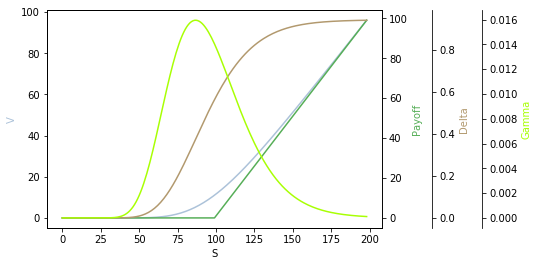

In [18]:
Graph('S', 'Call', V, Payoff, Delta, Gamma)

V
Payoff
Gamma


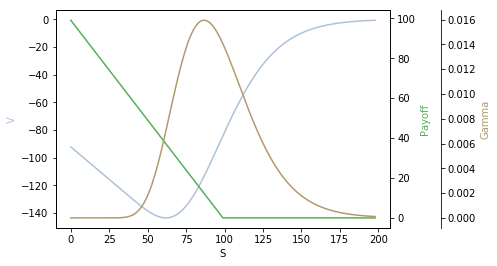

In [19]:
Graph('S', 'Put', V, Payoff, Gamma)